In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
## PCA - Principal Component Analysis

# Kaggle Digit recognizer train dataset: ./nmist_train_ds.csv

ds = pd.read_csv('./nmist_train_ds.csv')

In [3]:
print(ds.shape)
ds.head()

(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
label = ds.label
data = ds.drop('label',1)
print(label.shape , data.shape)
label.head()

(42000,) (42000, 784)


0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64

(28, 28)


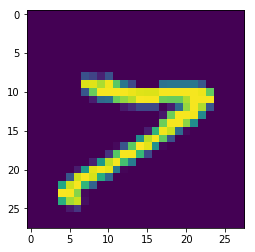

7


In [5]:
## checks

index = 1100
img = data.iloc[index].as_matrix().reshape(28,28)
print(img.shape)
plt.imshow(img)
plt.show()
print(label.iloc[index])

In [6]:
##  Standardization

import sklearn.preprocessing as skpre
data_std = skpre.StandardScaler().fit_transform(data)
data1 = data
data = data_std
print(data.shape)

(42000, 784)


In [7]:
covariance_matrix = np.matmul(data.T,data)
print(covariance_matrix.shape)

(784, 784)


In [8]:
import scipy.linalg as lg
lg.n_components = 2
eigen_value, eigen_vectors = lg.eigh(covariance_matrix,eigvals=(782,783))
''' since the covariance matrix is symmetric we are usng eigh() to find eigen values and vectors other wise we use eig() '''

print(eigen_value.shape)
print(eigen_value)
print(eigen_vectors.shape)
#eig_vectors = eigen_vectors.T
#print(eig_vectors.shape)
data_shifted = np.matmul(data,eigen_vectors)
#print(data_shifted
print(data_shifted.shape)

(2,)
[ 1222652.44613786  1709211.41082575]
(784, 2)
(42000, 2)


In [9]:
final_data = np.vstack((data_shifted.T,label)).T
final_data.shape

(42000, 3)

In [10]:
df = pd.DataFrame(final_data,columns=('PC 1','PC 2','label'))
df.head()

,PC 1,PC 2,label
0,-5.226445,-5.140478,1.0
1,6.032996,19.292332,0.0
2,-1.705813,-7.644503,1.0
3,5.836139,-0.474207,4.0
4,6.024818,26.559574,0.0


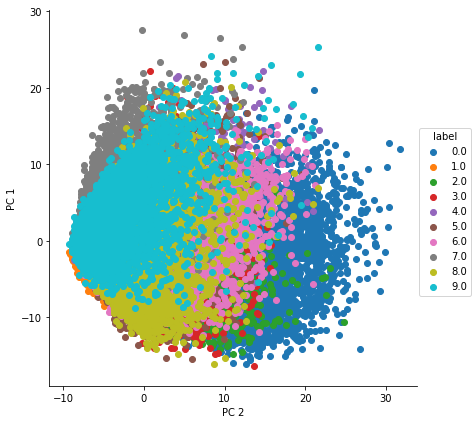

In [11]:
import seaborn as sns

sns.FacetGrid(df,hue='label',size=6).map(plt.scatter,'PC 2','PC 1').add_legend()
plt.show()


In [12]:
from sklearn.decomposition import PCA

pca_model = PCA(n_components=2)
data_transformed = pca_model.fit_transform(data_std)
print(data_transformed.shape)
print(label.shape)

(42000, 2)
(42000,)


In [13]:
final_ds = np.vstack((data_transformed.T,label.T)).T
final_ds = pd.DataFrame(final_ds,columns=('PC1','PC2','label'))
print(final_ds.head())
print(final_ds.shape)

         PC1       PC2  label
0  -5.140497 -5.227070    1.0
1  19.292342  6.033182    0.0
2  -7.644502 -1.705570    1.0
3  -0.474163  5.836543    4.0
4  26.559579  6.024828    0.0
(42000, 3)


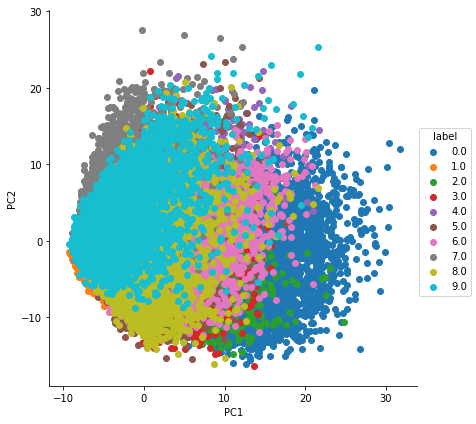

In [14]:
sns.FacetGrid(final_ds,hue='label',size=6).map(plt.scatter,'PC1','PC2').add_legend()
plt.show()

In [15]:
print(data_std.shape)
ds2 = data_std[:30000]
label2 = label[:30000]
print(ds2.shape , label2.shape)

(42000, 784)
(30000, 784) (30000,)


[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 42000 samples in 21.959s...
[t-SNE] Computed neighbors for 42000 samples in 2179.314s...
[t-SNE] Computed conditional probabilities for sample 1000 / 42000
[t-SNE] Computed conditional probabilities for sample 2000 / 42000
[t-SNE] Computed conditional probabilities for sample 3000 / 42000
[t-SNE] Computed conditional probabilities for sample 4000 / 42000
[t-SNE] Computed conditional probabilities for sample 5000 / 42000
[t-SNE] Computed conditional probabilities for sample 6000 / 42000
[t-SNE] Computed conditional probabilities for sample 7000 / 42000
[t-SNE] Computed conditional probabilities for sample 8000 / 42000
[t-SNE] Computed conditional probabilities for sample 9000 / 42000
[t-SNE] Computed conditional probabilities for sample 10000 / 42000
[t-SNE] Computed conditional probabilities for sample 11000 / 42000
[t-SNE] Computed conditional probabilities for sample 12000 / 42000
[t-SNE] Computed conditional probabilities fo

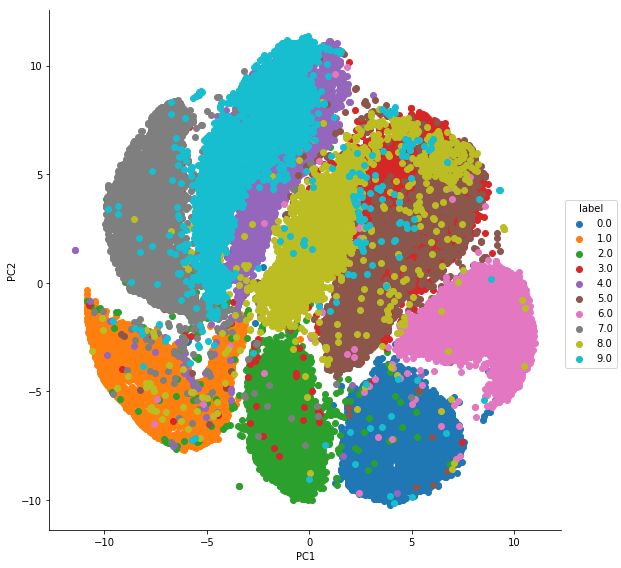

In [16]:
from sklearn.manifold import TSNE

# iter = 250 and perplexity=50 
# iter = 350 and perplexity=50
tsne_ds = TSNE(n_iter=350,perplexity=50,verbose=1,n_components=2).fit_transform(data1)
print(tsne_ds.shape)
ds3 = np.vstack((tsne_ds.T,label)).T
print(ds3.shape)
final_ds = pd.DataFrame(ds3,columns=('PC1','PC2','label'))
final_ds.head()
sns.FacetGrid(final_ds,hue='label',size=8).map(plt.scatter,'PC1','PC2').add_legend()
plt.show()

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 42000 samples in 17.834s...
[t-SNE] Computed neighbors for 42000 samples in 1983.324s...
[t-SNE] Computed conditional probabilities for sample 1000 / 42000
[t-SNE] Computed conditional probabilities for sample 2000 / 42000
[t-SNE] Computed conditional probabilities for sample 3000 / 42000
[t-SNE] Computed conditional probabilities for sample 4000 / 42000
[t-SNE] Computed conditional probabilities for sample 5000 / 42000
[t-SNE] Computed conditional probabilities for sample 6000 / 42000
[t-SNE] Computed conditional probabilities for sample 7000 / 42000
[t-SNE] Computed conditional probabilities for sample 8000 / 42000
[t-SNE] Computed conditional probabilities for sample 9000 / 42000
[t-SNE] Computed conditional probabilities for sample 10000 / 42000
[t-SNE] Computed conditional probabilities for sample 11000 / 42000
[t-SNE] Computed conditional probabilities for sample 12000 / 42000
[t-SNE] Computed conditional probabilities fo

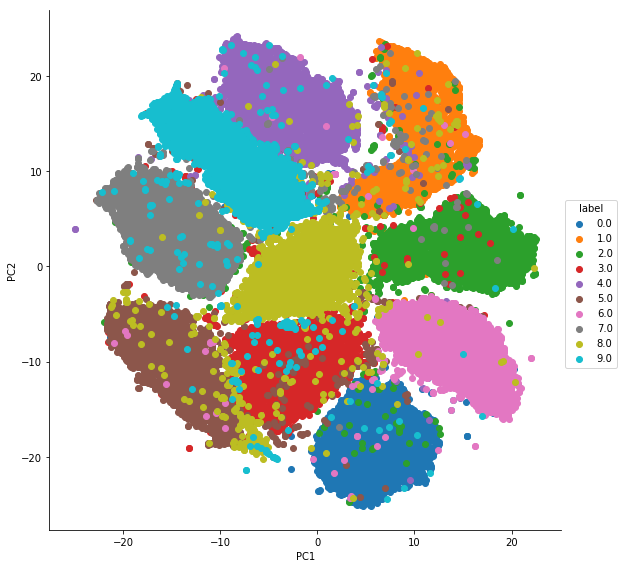

In [17]:
tsne_ds2 = TSNE(n_iter=500,perplexity=50,verbose=1,n_components=2).fit_transform(data1)
print(tsne_ds2.shape)
ds3 = np.vstack((tsne_ds2.T,label)).T
print(ds3.shape)
final_ds2 = pd.DataFrame(ds3,columns=('PC1','PC2','label'))
#final_ds.head()
sns.FacetGrid(final_ds2,hue='label',size=8).map(plt.scatter,'PC1','PC2').add_legend()
plt.show()

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 42000 samples in 18.838s...
[t-SNE] Computed neighbors for 42000 samples in 2023.583s...
[t-SNE] Computed conditional probabilities for sample 1000 / 42000
[t-SNE] Computed conditional probabilities for sample 2000 / 42000
[t-SNE] Computed conditional probabilities for sample 3000 / 42000
[t-SNE] Computed conditional probabilities for sample 4000 / 42000
[t-SNE] Computed conditional probabilities for sample 5000 / 42000
[t-SNE] Computed conditional probabilities for sample 6000 / 42000
[t-SNE] Computed conditional probabilities for sample 7000 / 42000
[t-SNE] Computed conditional probabilities for sample 8000 / 42000
[t-SNE] Computed conditional probabilities for sample 9000 / 42000
[t-SNE] Computed conditional probabilities for sample 10000 / 42000
[t-SNE] Computed conditional probabilities for sample 11000 / 42000
[t-SNE] Computed conditional probabilities for sample 12000 / 42000
[t-SNE] Computed conditional probabilities fo

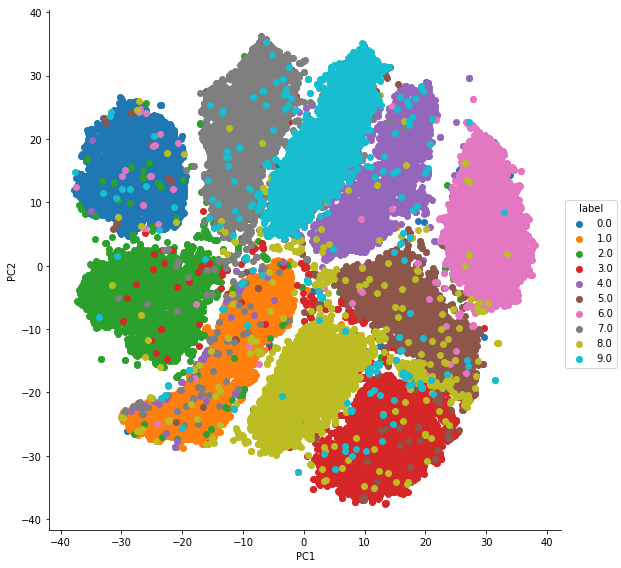

In [18]:
tsne_ds3 = TSNE(n_iter=700,perplexity=50,verbose=1,n_components=2).fit_transform(data1)
print(tsne_ds3.shape)
ds3 = np.vstack((tsne_ds3.T,label)).T
print(ds3.shape)
final_ds3 = pd.DataFrame(ds3,columns=('PC1','PC2','label'))
#final_ds.head()
sns.FacetGrid(final_ds3,hue='label',size=8).map(plt.scatter,'PC1','PC2').add_legend()
plt.show()
